<a href="https://colab.research.google.com/github/yenlungLai/Wormhole-Dynamics-in-Deep-Neural-Networks-Bridging-Noise-and-Meaningful-Labels/blob/main/Clustering_exp_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

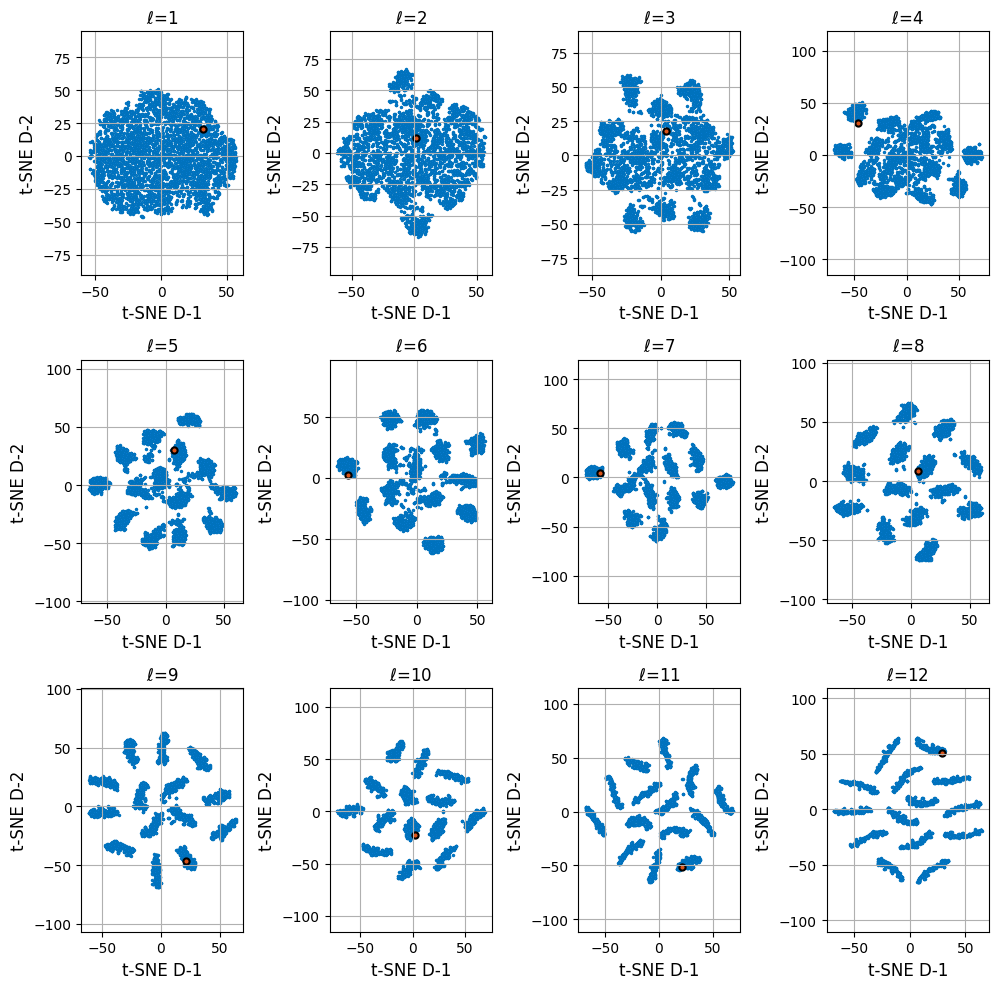

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Function definitions

def Encoding_mat(x, n, t):
    k = x.shape[0]
    rmat = np.random.randn(n, k)
    y = np.dot(rmat, x)
    abs_y = np.abs(y)
    sorted_index = np.argsort(abs_y)[::-1]
    top_index = sorted_index[:t]
    frmat = rmat[top_index, :]
    yfil = y[top_index]
    return yfil, frmat

# Parameters
n = 2**8
L = 12
k = 50
N = 500
R = 7  # Set R to any desired number of rounds

# Generate and normalize initial vector u
u = np.random.randn(1, k)
u /= np.linalg.norm(u)
inI = u.flatten()
frmatii = []
w_ell = []

# Generate output trained feature w for each layer
for ii in range(1, L + 1):
    y1, frmat = Encoding_mat(inI, n, len(inI))  # Custom function defined below
    inI = y1
    y1 /= np.linalg.norm(y1)
    frmatii.append(frmat)  # Store weight matrix, G_ell
    w_ell.append(y1)  # Store vectors w_ell

# Initialize G_L as identity matrix
Lfocus = 3
G_L = np.eye(frmatii[0].shape[1])  # Identity matrix of appropriate size

# Multiply weight matrices frmatii[Lfocus], frmatii[Lfocus-1],..., frmatii[0] in sequence
for ii in range(Lfocus-1, -1, -1):  # Iterating from frmatii[Lfocus] to frmatii[0] get model for recursive clustering
    G_L = np.dot(frmatii[ii], G_L)






# Generate layer feature for each point N
featureset = []
for _ in range(N):
    v = np.random.randn(k, 1)
    wp_ell = []
    for ell in range(L):
        G_ell = frmatii[ell]
        wp_i = np.dot(G_ell, v)
        wp_i /= np.linalg.norm(wp_i)
        v = wp_i
        wp_ell.append(v.flatten())
    featureset.append(np.array(wp_ell))

# Generate feature for R iterations using previous set features
featuresetR = []
for i in range(R):
    for Ncount in range(N):
        wp_ell = featureset[Ncount]
        wp_ell_t = np.dot(G_L, wp_ell.T)
        wp_ell_t /= np.linalg.norm(wp_ell_t)
        featureset[Ncount] = wp_ell_t.T
    featuresetR.append(featureset.copy())

# Prepare data for t-SNE
combined_vveccell = [item for sublist in featuresetR for item in sublist]

# Collect vectors for each layer
vvL = []
for ll in range(L):
    vv = []
    for jj in range(R * N):
        vvecjj = combined_vveccell[jj]
        vv.append(vvecjj[ll, :])
    vvL.append(np.array(vv))

# Prepare data for each subplot for particular i-th layer feature
y = {i: vvL[i - 1] for i in range(1, L + 1)}

# Number of rows and columns for subplots
cols = int(np.ceil(np.sqrt(L)))
rows = int(np.ceil(L / cols))
markerSize1 = 1
markerSize2 = 20
lineWidth = 1.5
fontSize = 12


# Number of rows and columns for subplots
cols = int(np.ceil(np.sqrt(L)))
rows = int(np.ceil(L / cols))
markerSize1 = 1
markerSize2 = 20
lineWidth = 1.5
fontSize = 12

# Create the first figure
plt.figure(figsize=(10, 10))

# Iterate over L to generate t-SNE plots for each dataset (First Figure)
for i in range(1, L + 1):
    combined_data = y[i]  # Replace `y[i]` with your specific dataset if necessary
    tsne = TSNE(n_components=2, random_state=0)
    Y = tsne.fit_transform(combined_data)

    # Create subplot
    plt.subplot(rows, cols, i)
    plt.scatter(Y[:, 0], Y[:, 1], s=markerSize1, color='#1E90FF', edgecolor='#0072BD', linewidth=lineWidth)
    plt.scatter(Y[0, 0], Y[0, 1], s=markerSize2, color='#D95319', edgecolor='#000000', linewidth=lineWidth)

    plt.xlabel('t-SNE D-1', fontsize=fontSize)
    plt.ylabel('t-SNE D-2', fontsize=fontSize)
    plt.grid(True)
    plt.title(f'$\ell$={i}', fontsize=fontSize)
    plt.axis('equal')

plt.tight_layout()
plt.show()



<ipython-input-3-61e8bc40c9e6>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 2*R)  # Adjusts to a colormap with enough distinct colors


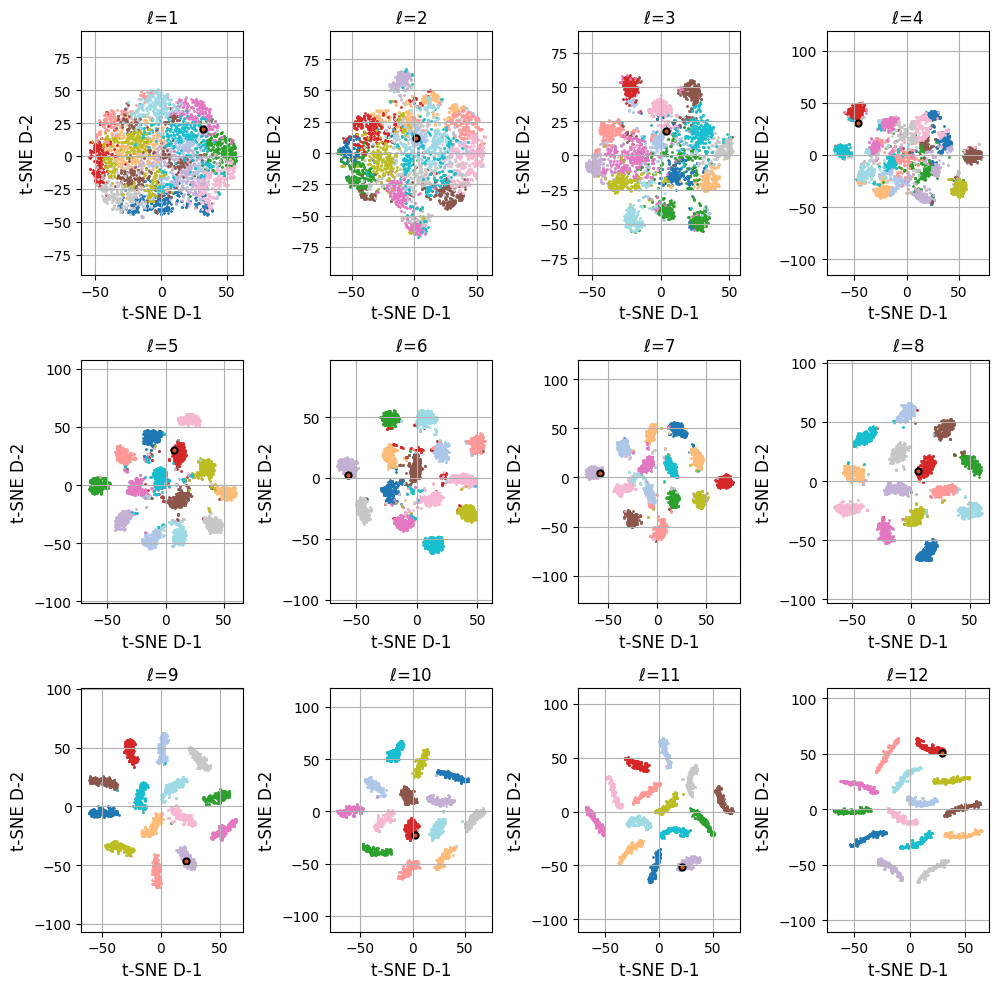

In [3]:
# plot with k-meas applied
# Create the second figure
plt.figure(figsize=(10, 10))

# Create a color map with 12 distinct colors
from matplotlib.colors import ListedColormap
colors = plt.cm.get_cmap('tab20', 2*R)  # Adjusts to a colormap with enough distinct colors

# Iterate over L to generate t-SNE plots for each dataset (Second Figure)
for i in range(1, L + 1):
    combined_data = y[i]  # Replace `y[i]` with your specific dataset if necessary

    # Apply K-Means clustering to assign clusters
    num_clusters = 2 * R  # Adjust as needed
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(combined_data)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    Y = tsne.fit_transform(combined_data)

    # Create subplot
    plt.subplot(rows, cols, i)

    # Plot each cluster with a different color from the color map
    for cluster in range(num_clusters):
        cluster_points = Y[cluster_labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=markerSize1, color=colors(cluster))

    # Highlight the first data point
    plt.scatter(Y[0, 0], Y[0, 1], s=markerSize2, color='#D95319', edgecolor='#000000', linewidth=lineWidth)

    plt.xlabel('t-SNE D-1', fontsize=fontSize)
    plt.ylabel('t-SNE D-2', fontsize=fontSize)
    plt.grid(True)
    plt.title(f'$\ell$={i}', fontsize=fontSize)
    plt.axis('equal')
    # Remove the legend for the second figure

plt.tight_layout()
plt.show()
